In [1]:
import time

In [2]:
start_time = time.time()

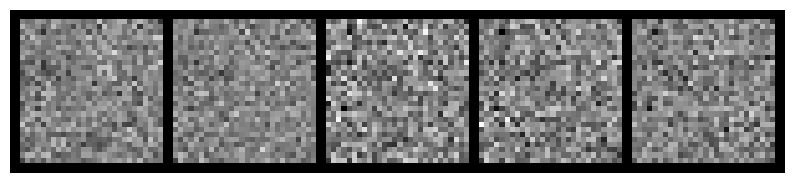

In [3]:
import torch
from torchvision.utils import save_image, make_grid
import os
import matplotlib.pyplot as plt

class Generator(torch.nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = torch.nn.Sequential(
            torch.nn.Linear(100, 256),
            torch.nn.ReLU(),
            torch.nn.Linear(256, 512),
            torch.nn.ReLU(),
            torch.nn.Linear(512, 784),
            torch.nn.Tanh()
        )

    def forward(self, z):
        return self.model(z).view(-1, 1, 28, 28)  # Reshape for a 28x28 image

generator = Generator()

def generate_and_save_images(num_images=50, save_path='./synthetic_images', show_images=5):
    os.makedirs(save_path, exist_ok=True)
    
    # Generate random noise as input for the generator
    z = torch.randn(num_images, 100)  # 100 is the input noise dimension
    
    # Generate synthetic images
    with torch.no_grad():
        synthetic_images = generator(z)
    
    # Save images
    for i in range(num_images):
        save_image(synthetic_images[i], os.path.join(save_path, f'image_{i+1}.png'))
    
    # Visualize some generated images
    grid = make_grid(synthetic_images[:show_images], nrow=show_images, normalize=True)
    plt.figure(figsize=(10, 5))
    plt.imshow(grid.permute(1, 2, 0))  # Permute dimensions to display correctly
    plt.axis('off')
    plt.show()

generate_and_save_images()


In [4]:
# End time measurement
end_time = time.time()
total_time = end_time - start_time
print(f'Time taken to generate and save 50 images: {total_time:.2f} seconds')

Time taken to generate and save 50 images: 2.78 seconds
